# Maternal Smoking and Infant Health Data Analysis


## Summary 

- This dataset belongs to an academic text called: "Deborah Nolan, and Terry Speed. Stat Labs: Mathematical Statistics Through Applications. Springer Texts in Statistics. New York: Springer, 2000."
- Location of the dataset used in this jupyterlab: https://www.stat.berkeley.edu/users/statlabs/labs.html#babiesI under the subheading "Maternal Smoking and Infant Health I"

### Limitations


## Dataset Attributes

- **bwt (Birth weight)**: Baby boys weight at birth in ounces. (999) indicates missing value.
- **smoke (Smoking status)**: Indicator for whether the mother smoked (1) or not (0) during her pregnancy. (9) inidcates missing value.


## Todo
- ~Check dataset for missing values~
- ~Split dataset into smokers and non smokers and analyse means, mode, etc.
- ~plots
- ~Place in guides showing "Most newborns range from 45 to 55 cm in length and from 5.5 to 8.8 pounds (2500 to 4000 grams or 88 to 140.8 oz). Babies born at term that weigh under 5.5 pounds are considered small for their gestational age.” pgs. 3-4"
- Maybe, change oz to lbs or to grams
- Analyse results more thoroughly
- Independent Samples t-test: https://numiqo.com/tutorial/unpaired-t-test 
- Use Welch's t-test (recommended default) if the group variances look different or the sample sizes are unequal.
- Probably best to use Welch's t-test due to unequal sample sizes. Variances are roughly equal (at 303 and 328) and both samples are normally distributed although one is slighlty bimodal but not to an extreme degree - the mean still represents this data fairly well.
- Practice Welch's test by hand here: https://www.statology.org/welchs-t-test/ then see if I can get the same result in this notebook.


## EDA

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [95]:
data = pd.read_csv('data/babiesI.csv', delimiter=' ')
data.head()

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bwt     1236 non-null   int64
 1   smoke   1236 non-null   int64
dtypes: int64(2)
memory usage: 19.4 KB


In [97]:
data['bwt'].describe()

count    1236.000000
mean      119.576861
std        18.236452
min        55.000000
25%       108.750000
50%       120.000000
75%       131.000000
max       176.000000
Name: bwt, dtype: float64

There are no zero values for weight. The max value is 176oz which is 11lb - a big baby but not likely an erroneous datapoint.

In [98]:
#Any missing smoke values? If so they'll appear as 9 in dataset
data['smoke'].value_counts()

smoke
0    742
1    484
9     10
Name: count, dtype: int64

For this dataset, 9 was added to smoking status if it was not known whether the mother smoked during pregnancy. We see here there are 10 missing values for smoking status. These values rows will need to be removed as they serve no value.

In [99]:
#Any missing birth weight values? If so they'll appear as 999 in dataset
missing_weight = (data['bwt'] == 999).sum()
display(missing_weight)

np.int64(0)

No missing values (999) in the birth weight column.

In [100]:
#Filter out rows with missing values in the smoke column (i.e. any row with a 9)
data_clean = data[data['smoke'] != 9].reset_index(drop=True)

In [101]:
data_clean['smoke'].value_counts()

smoke
0    742
1    484
Name: count, dtype: int64

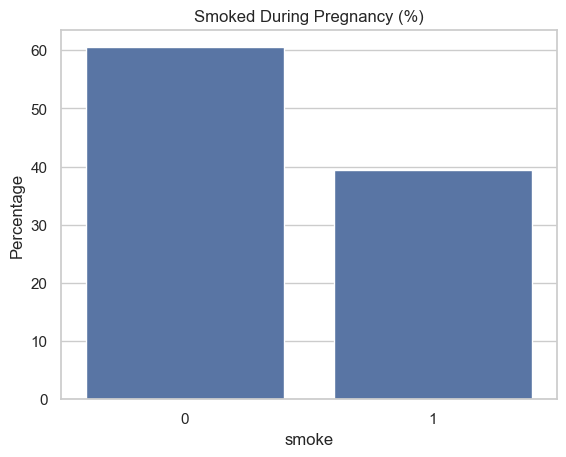

In [102]:
sns.countplot(data=data_clean, x='smoke', stat='percent')
plt.title('Smoked During Pregnancy (%)')
plt.ylabel('Percentage')
plt.show()

Is this dataset imbalanced? 

Only 40% of mothers smoked during preganancy for this sample. Could it be possible that some mothers might have been reluctant to admit to smoking while pregnant and that's why the value is at 40%? Maybe not since the dataset dates back to the 1960's.

Part of the data from this dataset comes from “the Child Health and Development Studies (CHDS) — a comprehensive investigation of all pregnancies that occurred between **1960 and 1967** among women in the Kaiser Foundation Health Plan in the San Francisco–East Bay area (Yerushalmy [Yer71])

In [103]:
#We need to analyse the descriptive statistics individually for birth weights of Baby boys of smoking mothers and non-smoking mothers

data_non_smoke = data_clean[data_clean['smoke']==0].reset_index(drop=True)
data_smoke = data_clean[data_clean['smoke']==1].reset_index(drop=True)

data_non_smoke.describe()

,bwt,smoke
count,742.000000,742.0
mean,123.047170,0.0
std,17.398689,0.0
min,55.000000,0.0
25%,113.000000,0.0
50%,123.000000,0.0
75%,134.000000,0.0
max,176.000000,0.0


In [104]:
data_smoke.describe()

,bwt,smoke
count,484.000000,484.0
mean,114.109504,1.0
std,18.098946,0.0
min,58.000000,1.0
25%,102.000000,1.0
50%,115.000000,1.0
75%,126.000000,1.0
max,163.000000,1.0


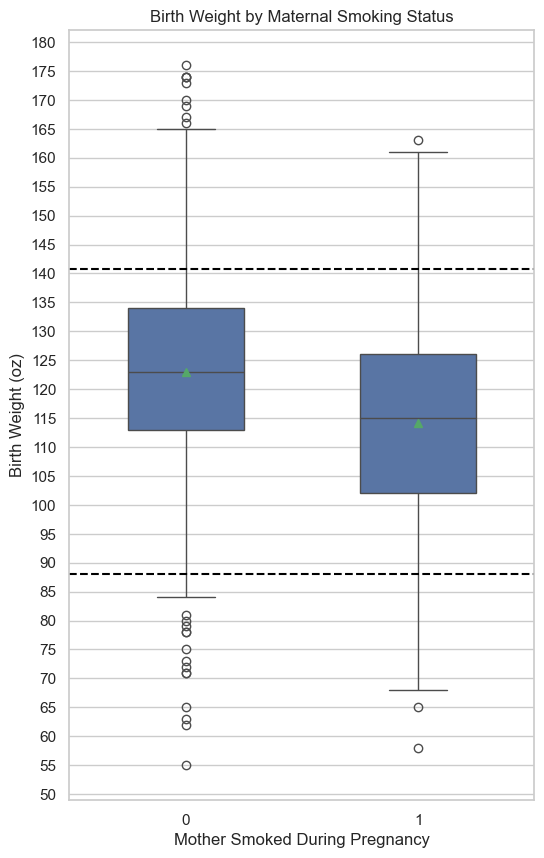

In [105]:
min_birth_weight = 88 #The minimum threshold weight for babies born at term. Under this value, babies are considered small for their gestational age.
max_birth_weight = 140.8 
plt.figure(figsize=(6, 10))
sns.set_theme(style='whitegrid')
sns.boxplot(data=data_clean, x='smoke', y='bwt', width=.5, showmeans=True)
plt.locator_params(axis='y', nbins=30)
plt.title('Birth Weight by Maternal Smoking Status')
plt.xlabel('Mother Smoked During Pregnancy')
plt.ylabel('Birth Weight (oz)')
plt.axhline(y=min_birth_weight, color='black', linestyle='--', label=f'min_birth_weight: {min_birth_weight:.2f}')
plt.axhline(y=max_birth_weight, color='black', linestyle='--', label=f'max_birth_weight: {max_birth_weight:.2f}')
plt.show()

Smoking during pregnancy has **reduced** the birth weights according to the mean and the median for this sample. But is this difference significant? Could do a Independent Samples t-test but only if the data has already been adjusted for mother's age, height, and other factors that could effect birth weight.

"Most newborns range from 45 to 55 cm in length and from 5.5 to 8.8 pounds (88oz to 140.8oz)...Babies born at term that weigh under 5.5 pounds are considered small for their gestational age.” pgs. 3-4 [Nol2000]

Normal weight ranges for babies born at term lie between black dotted lines (this might be for both genders).  

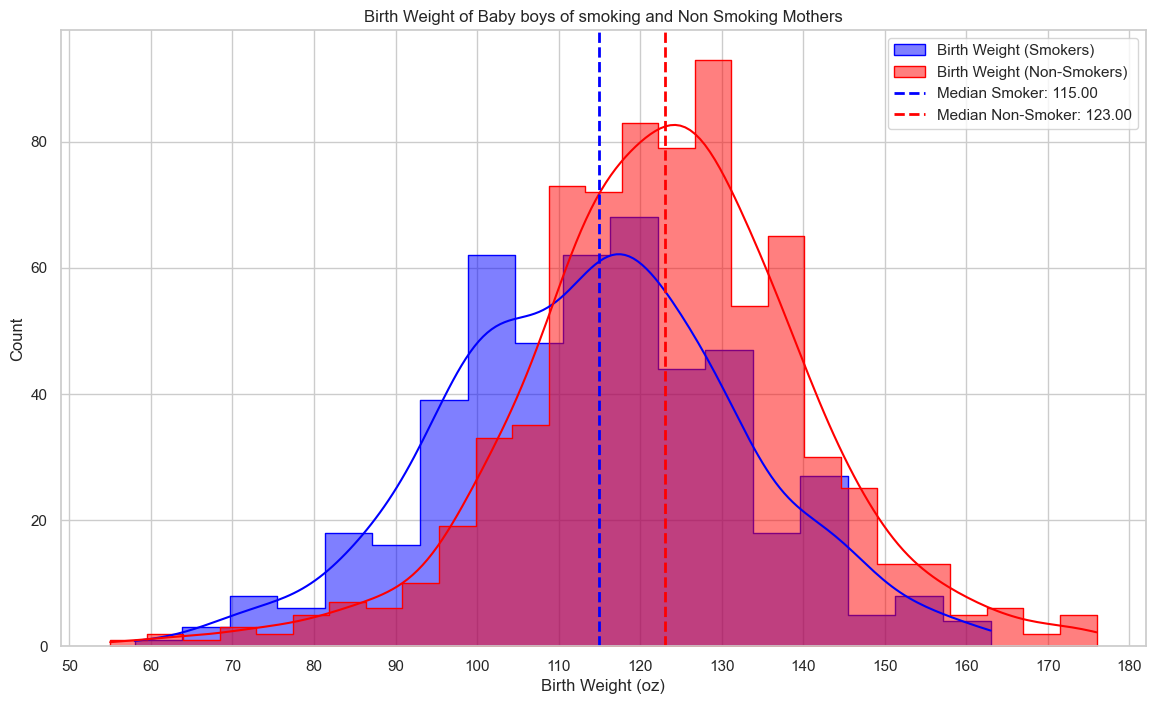

In [106]:
#using medians instead of means because medians more robust against outliers
median_smoke = data_smoke['bwt'].median()
median_non_smoke = data_non_smoke['bwt'].median()

sns.set_theme(style='whitegrid')
plt.figure(figsize=(14, 8))
sns.histplot(data_smoke['bwt'],
             stat='count',
             color='blue',
             label='Birth Weight (Smokers)',
             kde=True,
             element='step')

sns.histplot(data_non_smoke['bwt'],
             stat='count',
             color='red',
             label='Birth Weight (Non-Smokers)',
             kde=True,
             element='step')

plt.axvline(median_smoke, color='blue', linestyle='--', linewidth=2, label=f'Median Smoker: {median_smoke:.2f}')
plt.axvline(median_non_smoke, color='red', linestyle='--', linewidth=2, label=f'Median Non-Smoker: {median_non_smoke:.2f}')

plt.title('Birth Weight of Baby boys of smoking and Non Smoking Mothers')
plt.xlabel('Birth Weight (oz)')
plt.ylabel('Count')
plt.legend()
plt.locator_params(axis='x', nbins=20)
plt.show()


Birth weight distribution for smoking mothers is bimodal and slightly negatively skewed (skewed left). This bimodal distribution could be caused by the daily amount smoked by mothers. Some mothers may only smoke a little and, therefore, their babies will be born slightly higher weight; those who smoke a lot, will most likely have sons that weigh less at birth.  

Birth weight distribution for non-smoking mothers is unimodal.


In [107]:
#Testing out Welch's t-test with example data

sample1 = np.array([14, 15, 15, 15, 16, 18, 22, 23, 24, 25, 25])
sample2 = np.array([10, 12, 14, 15, 18, 22, 24, 27, 31, 33, 34, 34, 34])

mean1 = sample1.mean()
mean2 = sample2.mean()

#Double check these values
var1 = sample1.var()
var2 = sample2.var()

n1 = sample1.size
n2 = sample2.size

print(f'Mean of sample 1: {mean1:.2f}')
print(f'Mean of sample 2: {mean2:.2f}')
print(f'Variance of sample 1: {var1:.2f}')
print(f'Variance of sample 2: {var2:.2f}')
print(f'Size of sample 1: {n1}')
print(f'Size of sample 2: {n2}')

Mean of sample 1: 19.27
Mean of sample 2: 23.69
Variance of sample 1: 18.56
Variance of sample 2: 76.83
Size of sample 1: 11
Size of sample 2: 13


In [108]:

group1 = data_smoke['bwt']
group2 = data_non_smoke['bwt']

# Perform Welch's t-test
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

print(f"Welch's T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


Welch's T-statistic: -8.5813
P-value: 0.0000


## References
[Nol2000] Deborah Nolan, and Terry Speed. Stat Labs: Mathematical Statistics Through Applications. Springer Texts in Statistics. New York: Springer, 2000.

[Yer71] J. Yerushalmy. The relationship of parents’ cigarette smoking to outcome of pregnancy—implications as to the problem of inferring causation from observed associations. Am. J. Epidemiol., 93:443–456, 1971. 